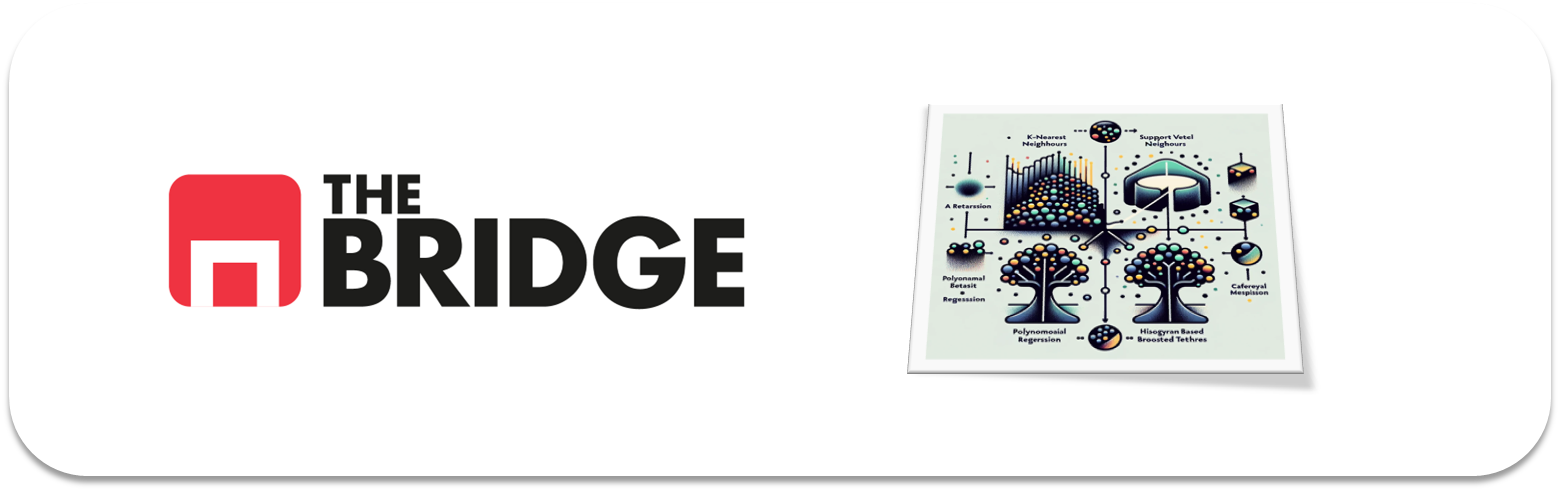

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [31]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import Pipeline

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
target_clf = "quality"
target_reg = "alcohol"

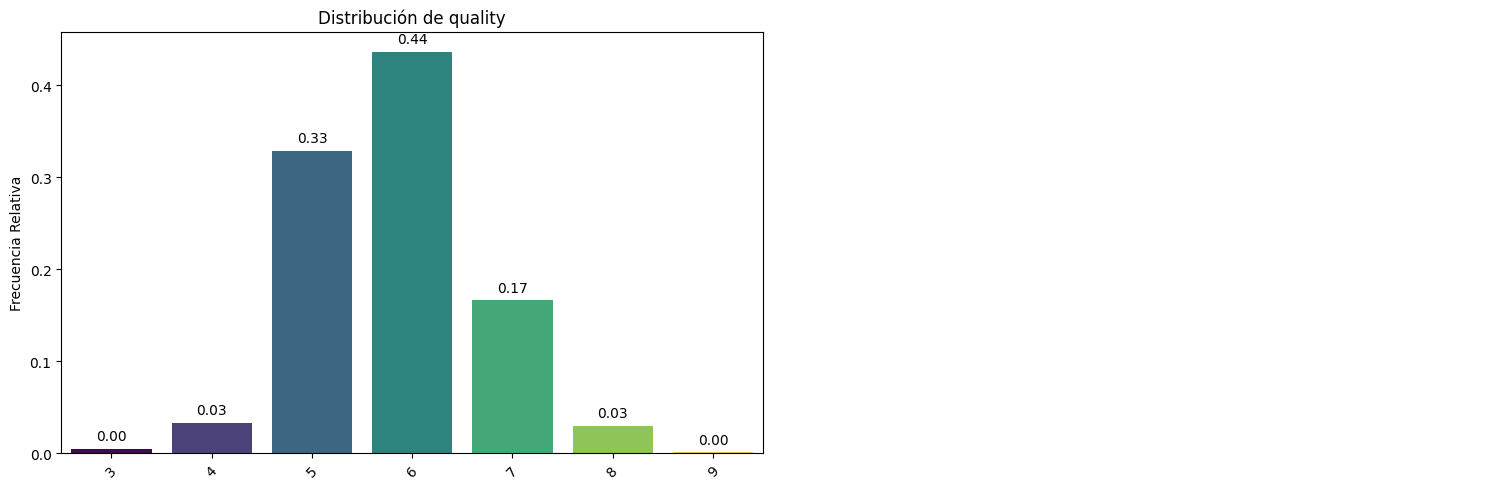

In [6]:
# Target clasificación

bt.pinta_distribucion_categoricas(df, [target_clf], mostrar_valores = True, relativa = True)

In [ ]:
# Multiclase muy desbalanceado. 

<Axes: xlabel='alcohol', ylabel='Count'>

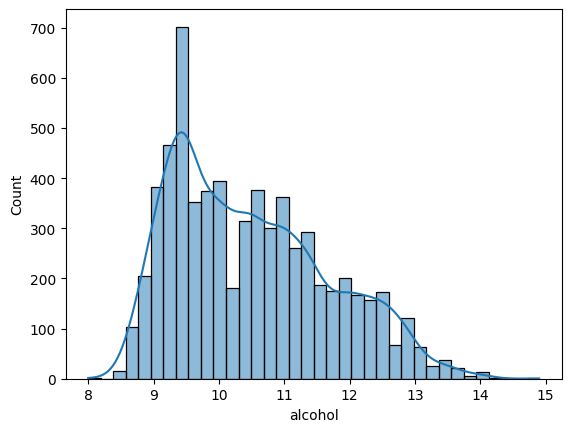

In [7]:
# Target regresión

sns.histplot(df[target_reg], kde = True)

In [9]:
# Distribución casi normal 

In [10]:
# Los separo ya, supongo que me valdrá para los dos casos 
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

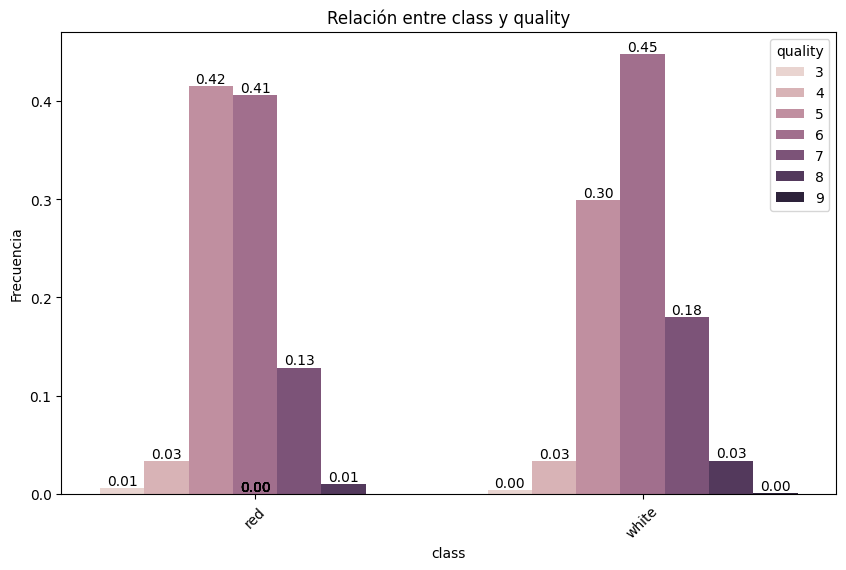

In [11]:
bt.plot_categorical_relationship_fin(train_set, "class", target_clf, show_values= True, relative_freq= True)

In [ ]:
features_clf_cat = ["class"] # Me la quedo. Algunos valores no cambian mucho, pero otros si. 

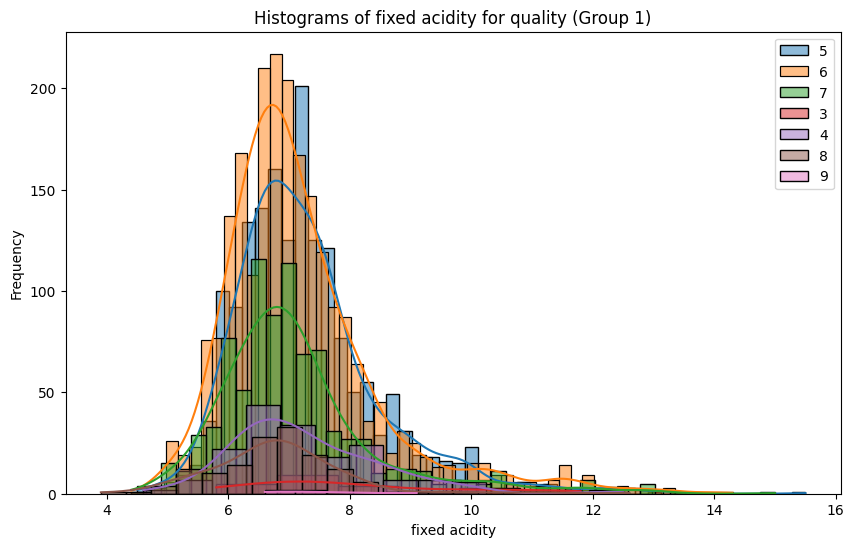

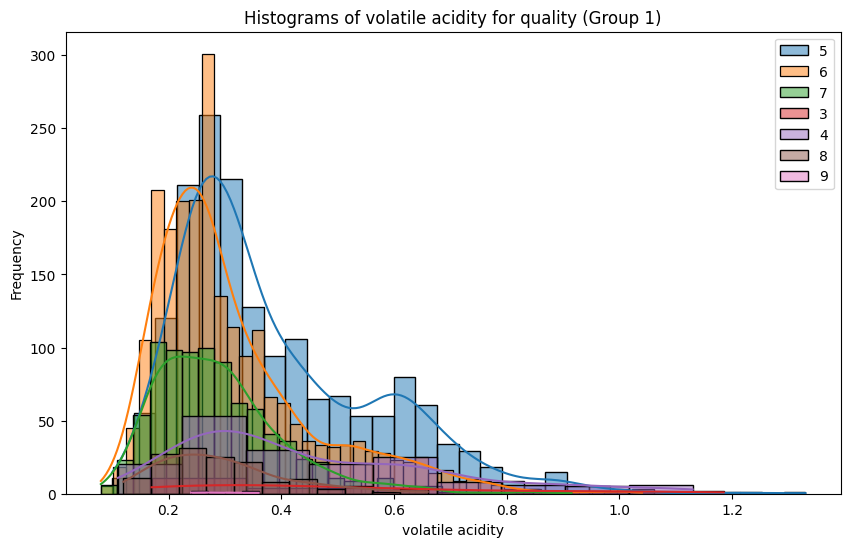

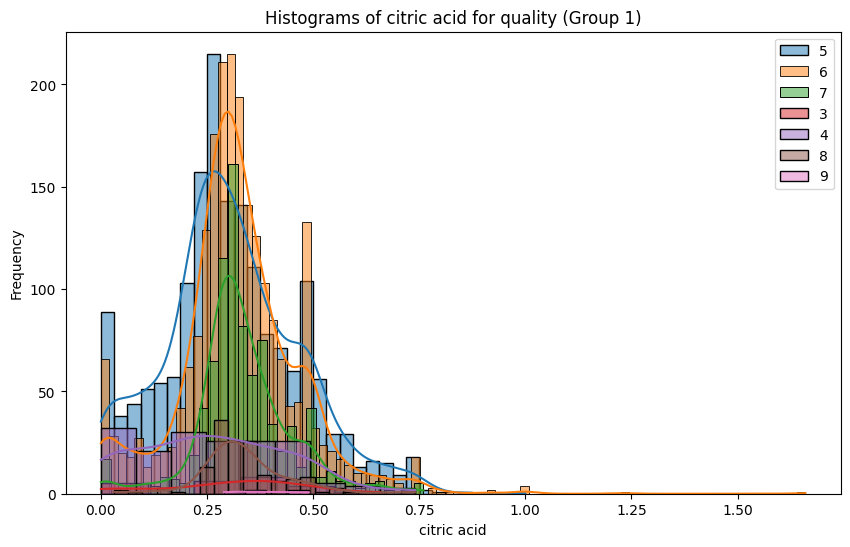

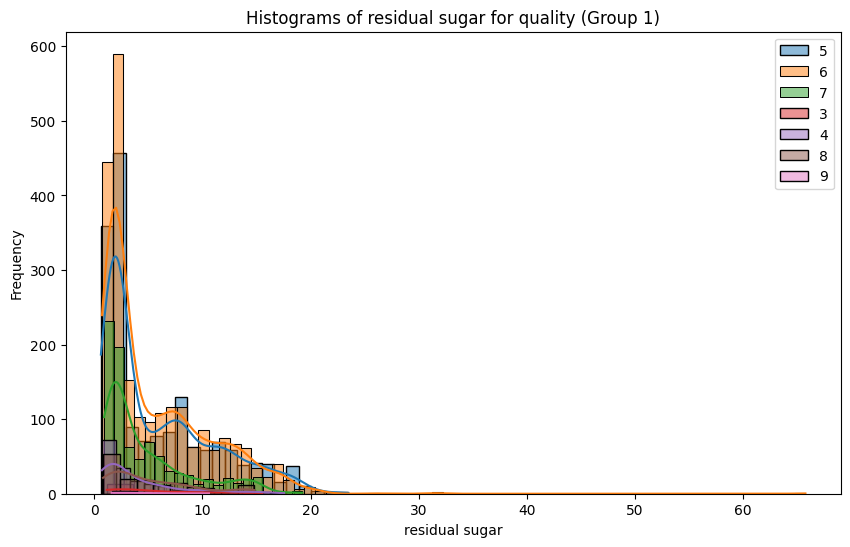

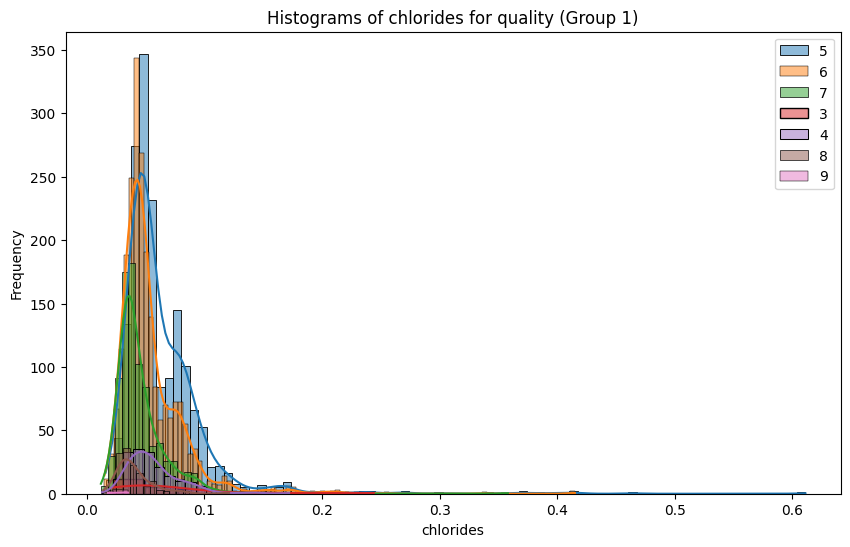

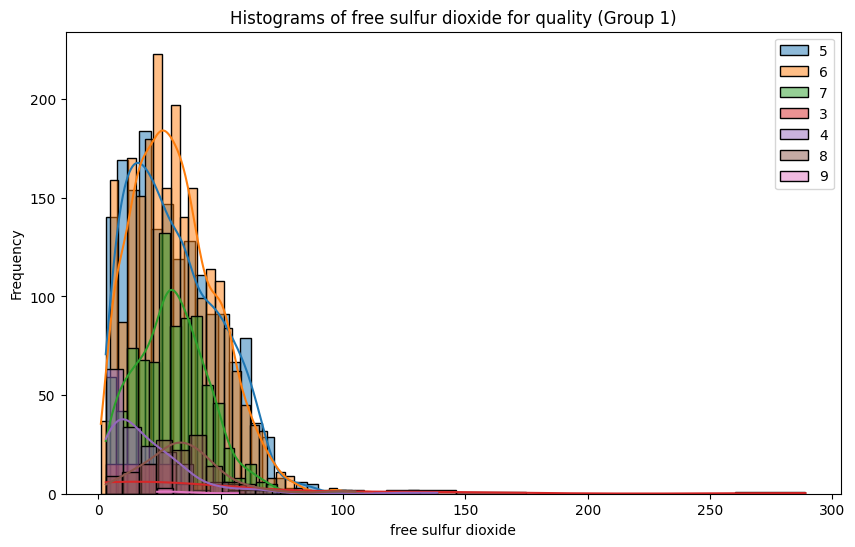

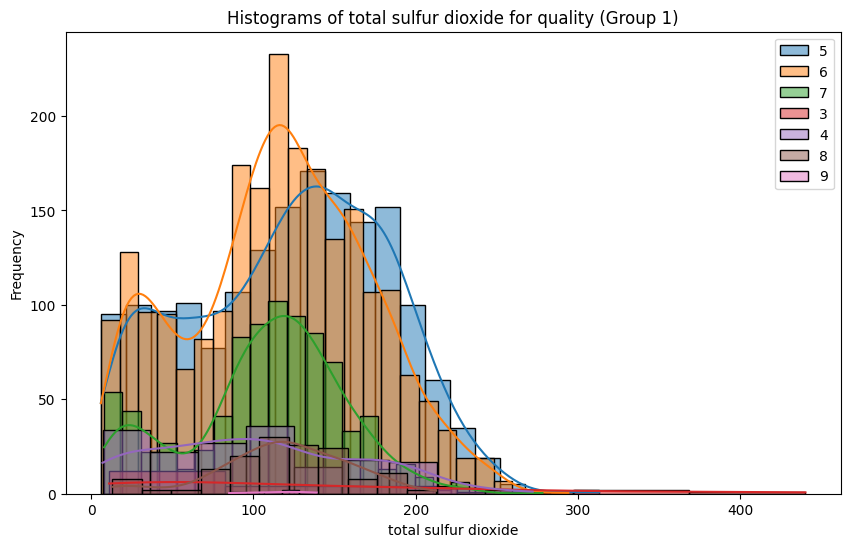

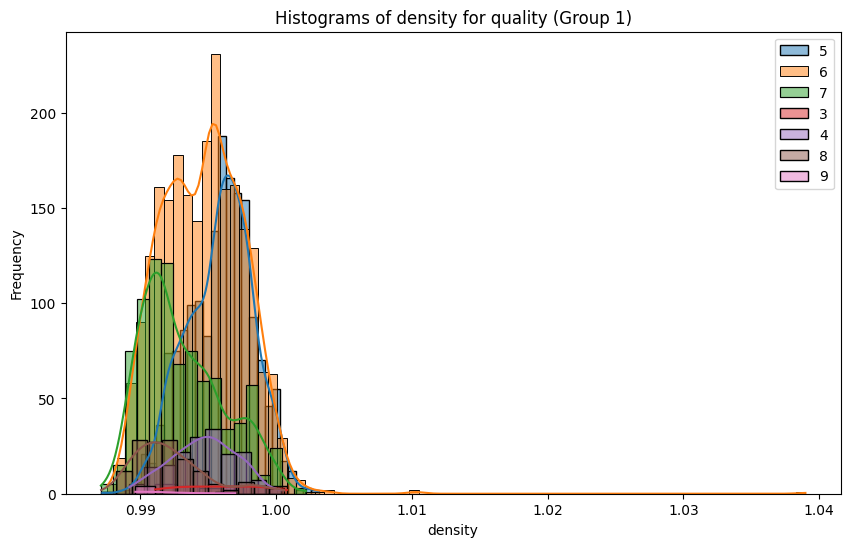

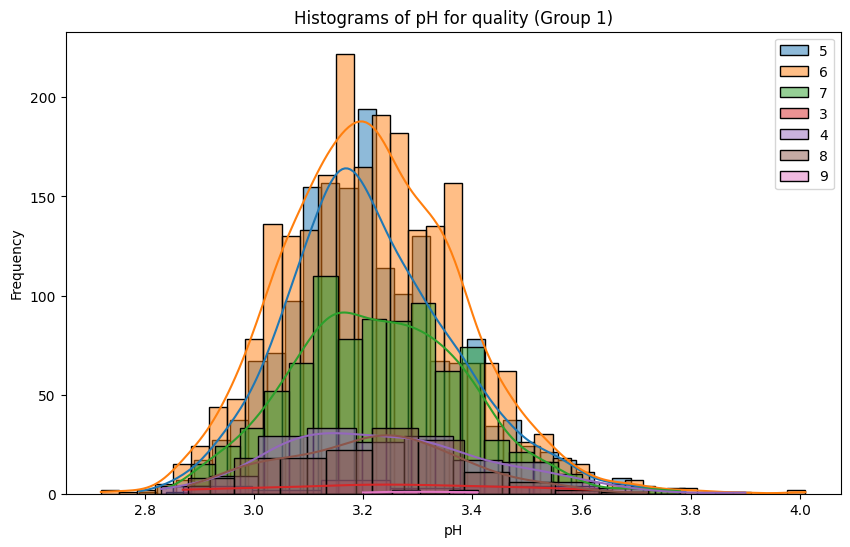

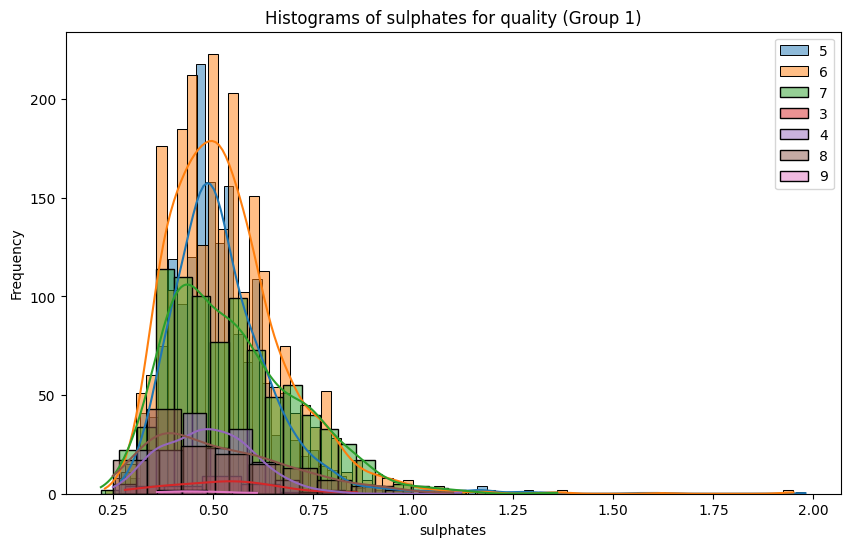

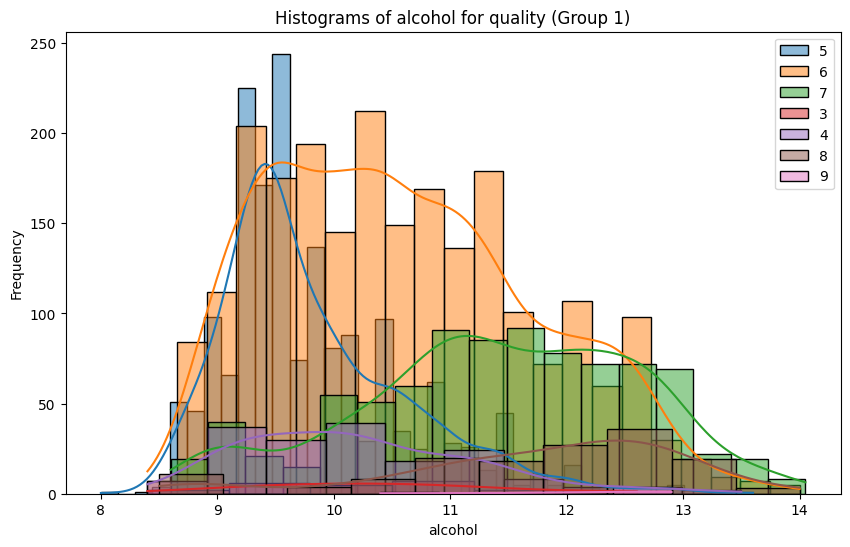

In [13]:
features_clf_num = [col for col in train_set.columns if col != "class" and col != target_clf]
for col in features_clf_num:
    bt.plot_grouped_histograms(train_set, cat_col= target_clf, num_col= col, group_size= train_set[target_clf].nunique())

<Axes: >

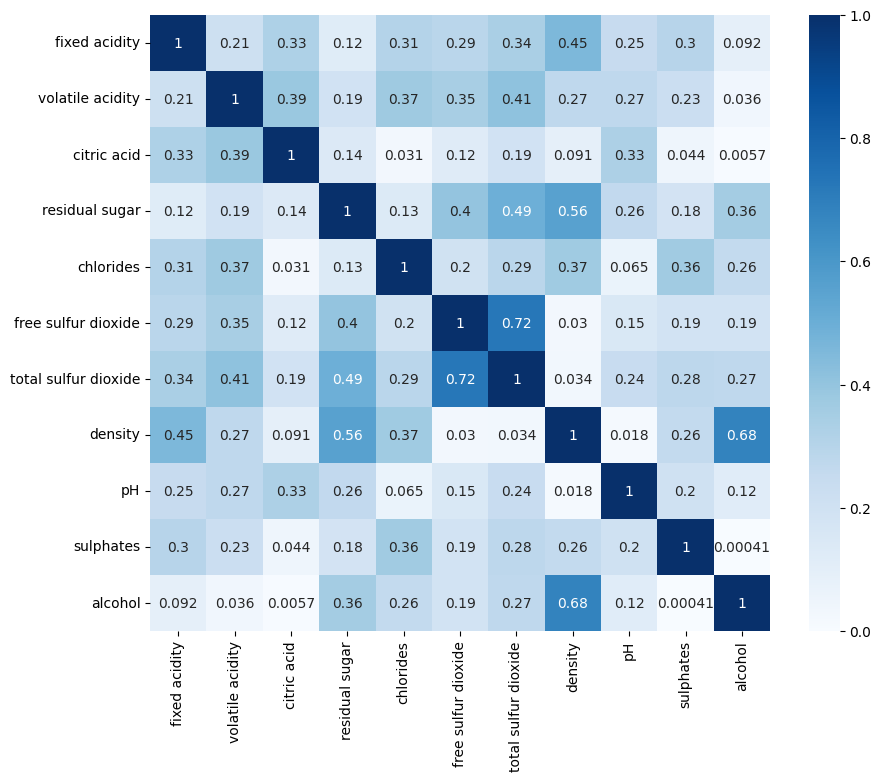

In [14]:
plt.figure(figsize= (10,8))
sns.heatmap(np.abs(train_set[features_clf_num].corr(numeric_only= "True")), annot= True, cmap = "Blues", vmin= 0, vmax= 1)

In [16]:
# Ahora voy a escalar 

In [17]:
train_set["class"] = (train_set["class"] == "white").astype(int) 
test_set["class"] = (test_set["class"] == "white").astype(int) 

In [ ]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,1
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,1
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,1
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,5,1
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,5,1
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7,1
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8,1


In [19]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [20]:
for col in features_clf_num:
    desplaza = 0
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

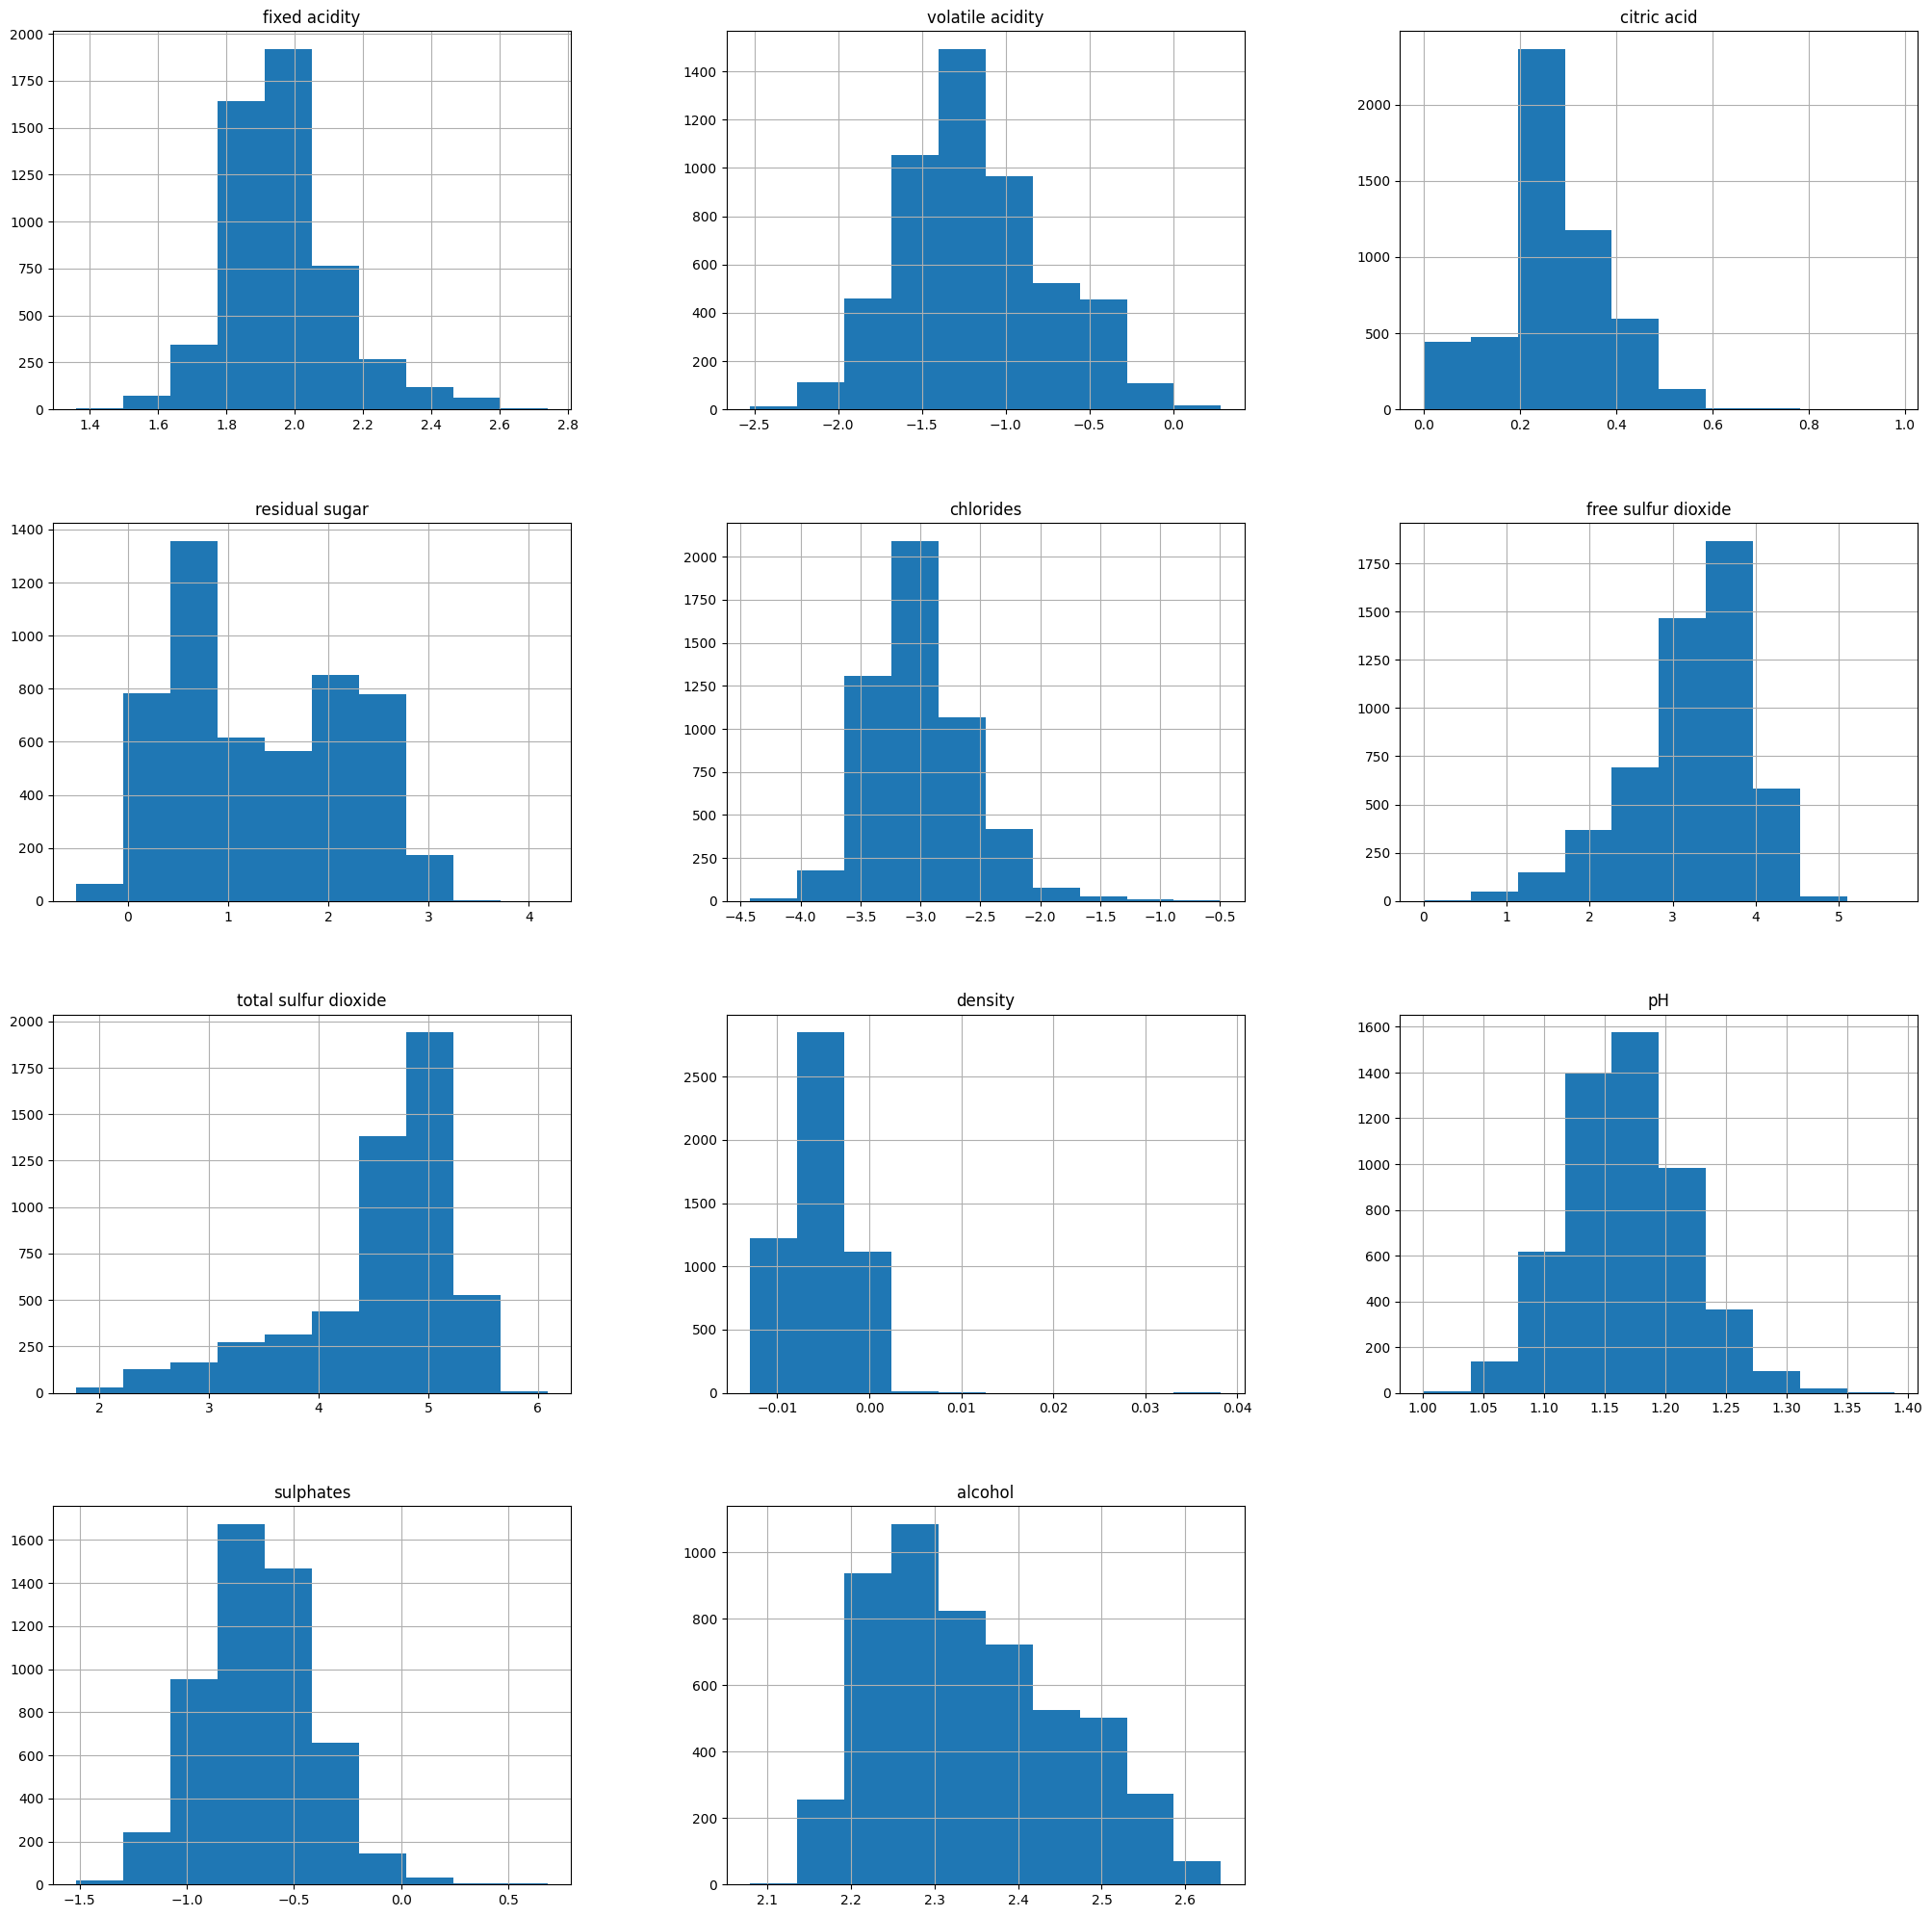

In [25]:
train_set_scaled[features_clf_num].hist(figsize = (25,25))
plt.tight_layout
plt.show()

In [26]:
scaler = StandardScaler()

train_set_scaled[features_clf_num] = scaler.fit_transform(train_set_scaled[features_clf_num])
test_set_scaled[features_clf_num] = scaler.transform(test_set_scaled[features_clf_num])

In [28]:
train_set_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5197.000000,5197.000000
mean,-5.605590e-16,-2.214892e-16,7.656416e-17,2.734434e-18,5.714968e-16,-1.709021e-16,1.668005e-16,-2.953189e-16,3.677814e-16,-8.169122e-17,-1.225027e-15,5.817587,0.751780
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,0.870688,0.432022
min,-3.650546e+00,-3.093987e+00,-2.452808e+00,-2.130418e+00,-3.375535e+00,-4.578518e+00,-3.851433e+00,-2.534994e+00,-3.387954e+00,-3.303529e+00,-2.375888e+00,3.000000,0.000000
25%,-6.406275e-01,-6.678919e-01,-4.329462e-01,-8.590345e-01,-6.595501e-01,-5.432713e-01,-3.193079e-01,-7.816844e-01,-6.738855e-01,-6.902881e-01,-8.335817e-01,5.000000,1.000000
50%,-9.608146e-02,-1.353685e-01,-8.563028e-03,-2.678746e-01,-1.587052e-01,2.174037e-01,2.927357e-01,6.325698e-02,-3.283104e-02,-2.494373e-02,-1.079576e-01,6.000000,1.000000
75%,4.830897e-01,6.034131e-01,5.928880e-01,8.815795e-01,6.052801e-01,7.105928e-01,6.811085e-01,7.602031e-01,6.496590e-01,6.087895e-01,7.236285e-01,6.000000,1.000000
max,4.734467e+00,3.363578e+00,6.402853e+00,3.305764e+00,5.884922e+00,3.491975e+00,2.123631e+00,1.439277e+01,4.474458e+00,5.264422e+00,2.678497e+00,9.000000,1.000000


In [43]:
X_train_clf = train_set_scaled[features_clf_num]
X_test_clf = test_set_scaled[features_clf_num]

y_train_clf = train_set[target_clf]
y_test_clf = test_set[target_clf]

In [39]:
# Elegimos los modelos. 

knn_pequeño = KNeighborsClassifier(n_neighbors= 7, weights= "distance")
knn_grande = KNeighborsClassifier(n_neighbors= 12, weights = "distance")
rf = RandomForestClassifier(max_depth = 10, random_state= 42, class_weight = "balanced")
lgb = LGBMClassifier(max_depth = 10, random_state = 42, verbose = -100, class_weight = "balanced", n_jobs=-1)

modelos = {
    "KNN_pequeño": knn_pequeño,
    "KNN_grande": knn_grande,
    "Random Forest": rf,
    "LightGBM": lgb
}

In [45]:
print(type(X_train_clf))
print(X_train_clf.shape)

<class 'pandas.core.frame.DataFrame'>
(5197, 11)


In [46]:
for feature_set, X_train in X_train_clf.items():
    print(f"Para el set {feature_set}:")
    for tipo,modelo in modelos.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train_clf, y_train_clf, cv = 5, scoring = "balanced_accuracy")))
    print("******")

Para el set fixed acidity:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******
Para el set volatile acidity:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******
Para el set citric acid:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******
Para el set residual sugar:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******
Para el set chlorides:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******
Para el set free sulfur dioxide:
KNN_pequeño:  0.33936575164828975
KNN_grande:  0.3373692222350163
Random Forest:  0.3463449219189994
LightGBM:  0.35270300341249083
******


In [47]:
param_grid = {
    "n_estimators": [50,250,1000],
    "max_depth": [1,5,10,20],
    "learning_rate": [0.1,0.3,0.6,1,0.01],
    "class_weight": ["balanced"]
}

lgb_clf = LGBMClassifier(verbose = -100, n_jobs= -1)

lgb_grid = GridSearchCV(lgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

lgb_grid.fit(X_train_clf, y_train_clf)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifie... verbose=-100)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced'], 'learning_rate': [0.1, 0.3, ...], 'max_depth': [1, 5, ...], 'n_estimators': [50, 250, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fo

In [48]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.01,
 'max_depth': 20,
 'n_estimators': 50}

In [49]:
lgb_grid.best_score_

np.float64(0.3709029036259611)

In [51]:
y_pred = lgb_grid.best_estimator_.predict(X_test_clf)

print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.14      0.44      0.21        43
           5       0.63      0.57      0.60       432
           6       0.61      0.31      0.41       562
           7       0.37      0.53      0.44       210
           8       0.17      0.60      0.27        47
           9       0.00      0.00      0.00         0

    accuracy                           0.45      1300
   macro avg       0.27      0.35      0.28      1300
weighted avg       0.54      0.45      0.46      1300



c:\Users\rukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

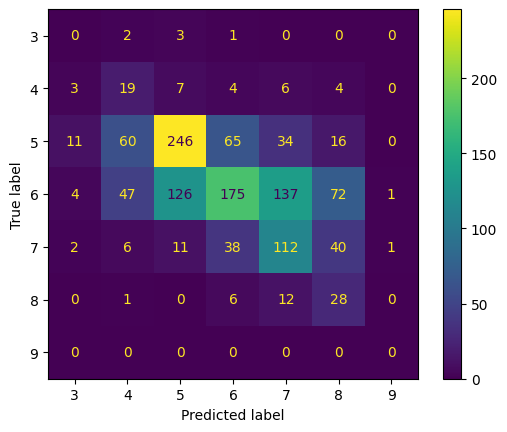

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred)

plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.